In [40]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split


X,Y = make_blobs(n_samples = 500, n_features = 2, centers = 4, random_state= 42, cluster_std = 3)

In [41]:
x = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(Y).type(torch.float)


In [42]:
x_train ,  x_test ,y_train , y_test = train_test_split(x,y,test_size=0.2 , random_state= 42)
y_test[:10], y_train.dtype
y_train = y_train.type(torch.long)
y_test = y_test.type(torch.long)

/tmp/ipython-input-224029613.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


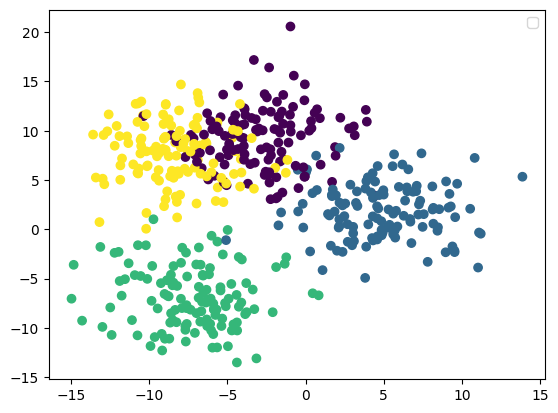

In [43]:
def plot(x_test = x_test , y_test = y_test,x_train=x_train,y_train = y_train, prediction = None ):
  plt.scatter(x_train[:,0],x_train[:,1] ,c =y_train)
  plt.scatter(x_test[:,0],x_test[:,1], c = y_test  )
  plt.legend()
  plt.show()
plot()

In [44]:
class model(nn.Module):
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
        nn.Linear(in_features=2, out_features=20),
        nn.ReLU(),
        nn.Linear(in_features = 20, out_features=150),
        nn.ReLU(),
         nn.Linear(in_features = 150, out_features=150),
        nn.ReLU(),
         nn.Linear(in_features = 150, out_features=10),
        nn.ReLU(),
        nn.Linear(in_features=10,out_features=4), # Changed out_features to 4
    )

  def forward(self , x ):
    return self.layers(x)

In [45]:
cluster = model()

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = cluster.parameters(), lr = 0.001 , momentum = 0)

In [46]:
#training pipeline
logits = cluster(x_train)
logits
def accuracy(y_true, y_pred):
  y = torch.eq(y_true, y_pred).sum().item()
  acc = (y/len(y_true))
  return acc


/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:1773: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


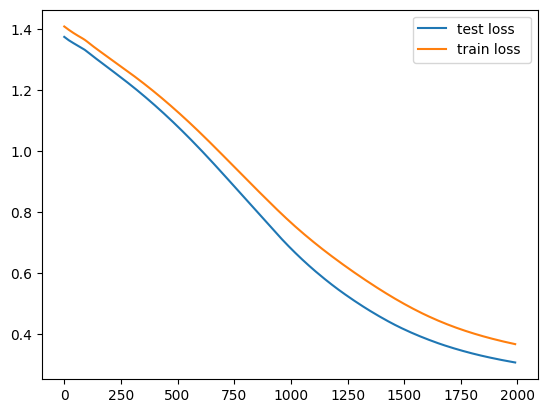

In [47]:
te_loss = []
tr_loss = []
acc = []
xax = []
epochs = 2000

for epoch in range(epochs):
  cluster.train()
  logits = cluster(x_train)
  y_tran_pred = nn.Softmax()(logits)
  trainLoss = loss_fn(logits,y_train) # Pass logits directly

  optimizer.zero_grad()

  trainLoss.backward()
  optimizer.step()
  cluster.eval()
  with torch.inference_mode():
    testLogits = cluster(x_test)
    y_test_pred = nn.Softmax()(testLogits)
    test_loss = loss_fn(testLogits,y_test)

    if(epoch % 10 == 0): # Corrected eval to epoch
      te_loss.append(test_loss.item())
      tr_loss.append(trainLoss.item())
      xax.append(epoch)
      # acc.append(accuracy(y_test,y_test_pred))


plt.plot(xax , te_loss,label  = "test loss")
plt.plot(xax , tr_loss , label = "train loss ")
plt.legend()
plt.show()

In [48]:
from pathlib import Path
import requests

In [49]:
path = Path("helpingFunction.py")
if path.exists():
  print("file already exist")
else:
  print("file downloading")
  response = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helpingFunction.py" , "wb") as f:
    f.write(response.content)

file already exist


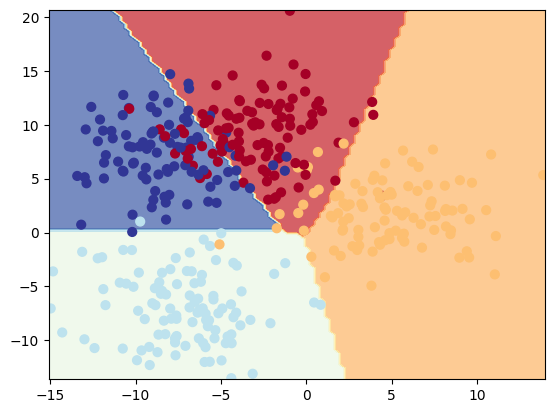

In [50]:
from helpingFunction import plot_decision_boundary
plot_decision_boundary(cluster,x_train,y_train)

In [51]:
from sys import last_value
with torch.inference_mode():
  logits = cluster(x_test)
  output = nn.Softmax(dim = 1)(logits)
label = torch.argmax(output, dim = 1)
label ,y_test


(tensor([0, 3, 3, 3, 3, 2, 1, 0, 1, 1, 2, 0, 2, 3, 2, 3, 0, 2, 3, 2, 3, 3, 0, 3,
         0, 1, 2, 2, 1, 1, 0, 0, 3, 3, 1, 3, 2, 1, 3, 3, 3, 2, 2, 3, 3, 2, 3, 0,
         1, 1, 2, 1, 1, 2, 2, 0, 0, 3, 1, 1, 0, 3, 0, 3, 3, 3, 3, 1, 1, 1, 2, 1,
         1, 2, 1, 0, 1, 2, 2, 1, 0, 2, 2, 0, 1, 3, 0, 0, 1, 3, 0, 0, 2, 3, 2, 0,
         3, 3, 0, 1]),
 tensor([0, 3, 3, 3, 3, 2, 1, 3, 1, 1, 2, 0, 2, 3, 2, 3, 3, 2, 3, 2, 3, 0, 0, 3,
         0, 1, 2, 2, 1, 1, 3, 0, 3, 3, 1, 3, 2, 1, 3, 3, 3, 2, 2, 3, 0, 2, 3, 0,
         1, 1, 2, 0, 1, 2, 2, 0, 0, 3, 1, 1, 0, 3, 3, 3, 0, 3, 3, 1, 1, 1, 2, 1,
         1, 2, 1, 0, 1, 2, 2, 1, 0, 2, 2, 0, 1, 3, 0, 0, 1, 3, 3, 0, 2, 3, 2, 0,
         3, 3, 0, 1]))

In [52]:
from torchmetrics import Accuracy

acc = Accuracy(task='multiclass', num_classes=4) # Specify the task and number of classes
# Calculate accuracy using the predicted labels and true labels
accuracy_score = acc(label, y_test)
print(f"Accuracy: {accuracy_score.item()}")

Accuracy: 0.9100000262260437
